

    
<div class="alert alert-block alert-info">
    <b>Author: Atef Bader, Jonathan De Leon (Requirements)</b> <br> 
    <b>Last Edit: 9/6/2021</b>
</div>
        

<div class="alert alert-block alert-danger"><b>Warning:</b> If you want to rerun the script, make sure to drop the <b>trans4cust</b> table from the command prompt of sqlite3 shell before you rerun the script.</div>

# Objectives:

In this exercise, you will:

 - Analyze the dataset in the given CSV file
 - Clean the given dataset
 - Load the dataset into sqlite database engine
 - Execute different SQL queries


###   Data Preparation

As a data scientist for BestDeal retailer, you
have been tasked with improving their revenue and the effectiveness of the
marketing campaign of their electronic products. The given dataset has
10,000 records for the purchases of their customers and is used to predict
customers shopping patterns and to provide answers for ad-hoc queries.
The dataset DirtyData4BestDeal10000.csv is drawn from its database of
customers.

In [38]:
import pandas as pd  # panda's nickname is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience

import sqlalchemy

from sqlalchemy import create_engine

from sqlalchemy import inspect

### Lets read the dirtydata4bestdeal CSV and load into a dataframe object

In [2]:
dirtydata4bestdeal=pd.read_csv('DirtyData4BestDeal10000.csv')

In [3]:

# Do you see NaN values below?

dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

<AxesSubplot:>

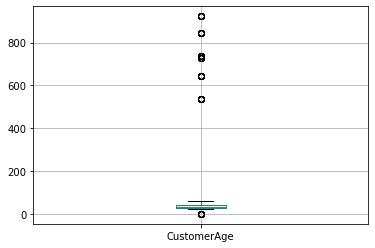

In [4]:
dirtydata4bestdeal.boxplot(column='CustomerAge')


<AxesSubplot:>

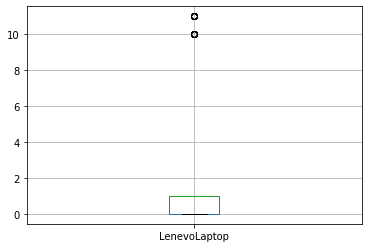

In [5]:
dirtydata4bestdeal.boxplot(column='LenevoLaptop')

<AxesSubplot:>

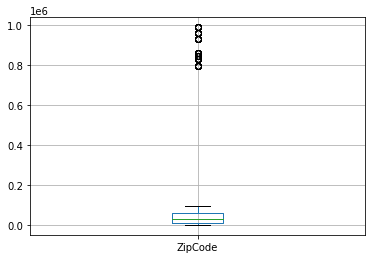

In [6]:
dirtydata4bestdeal.boxplot(column='ZipCode')


### Lets clean the dirty/messy data in the dirtydata4bestdeal dataframe object

In [13]:
# Drop the NaN values 

cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()

# Do you see NaN values dropped below?


,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [14]:
#check for null values
cleandata4bestdeal.isnull().sum().sum()

0

## Data Cleaning De Leon

In [15]:
pd.set_option('display.max_columns', 500)
cleandata4bestdeal.tail()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,iPhone,Panasonic50LED,SonyPS4,WiiU,WDexternalHD,SamsungTV55LED,SonyTV60LED,SandiskMemoryCard,SonySoundSystem,SonyCamera,PanasonicCamera,HPPrinter,SonyDVDplayer,ToshibaDVDplayer,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
9993,90033.0,38.0,1,1,1,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,1,1.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
9994,2109.0,27.0,0,1,1,0,1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1,0,1.0,0.0,1.0,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
9995,33129.0,22.0,1,0,0,1,0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,1,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1
9996,90024.0,21.0,0,1,1,1,0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0,1.0,1.0,1.0,1,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0
9999,44114.0,35.0,1,1,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,1.0,0.0,0.0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1


### Check data types

In [58]:
cleandata4bestdeal.dtypes


ZipCode               float64
CustomerAge           float64
SamsungTV46LED          int64
SonyTV42LED            object
XBOX360                object
DellLaptop              int64
BoseSoundSystem         int64
BoseHeadSet           float64
SonyHeadSet           float64
iPod                  float64
iPhone                float64
Panasonic50LED        float64
SonyPS4               float64
WiiU                  float64
WDexternalHD          float64
SamsungTV55LED        float64
SonyTV60LED           float64
SandiskMemoryCard     float64
SonySoundSystem       float64
SonyCamera              int64
PanasonicCamera         int64
HPPrinter             float64
SonyDVDplayer         float64
ToshibaDVDplayer      float64
GalaxyTablet            int64
SurfaceTablet         float64
HPLaptop              float64
HDMICable             float64
SpeakerCable          float64
CallOfDutyGame        float64
GrandTheftAutoGame    float64
ASUSLaptop            float64
LenevoLaptop          float64
TVStandWal

We can see we have a few columns that are not object types, so we will not be able to use command operations like > or <. We'll work on these columns seperately

In [17]:
#let's get the columns into a list and adjust for the columns we want to iterate through
pur_cols = cleandata4bestdeal.columns
pur_cols = pur_cols.tolist()
pur_cols.pop(0)
pur_cols.pop(0)
pur_cols.pop(0)
pur_cols.pop(0)
pur_cols.pop(0)
pur_cols.pop(0)
pur_cols.pop(0)
pur_cols

['BoseHeadSet',
 'SonyHeadSet',
 'iPod',
 'iPhone',
 'Panasonic50LED',
 'SonyPS4',
 'WiiU',
 'WDexternalHD',
 'SamsungTV55LED',
 'SonyTV60LED',
 'SandiskMemoryCard',
 'SonySoundSystem',
 'SonyCamera',
 'PanasonicCamera',
 'HPPrinter',
 'SonyDVDplayer',
 'ToshibaDVDplayer',
 'GalaxyTablet',
 'SurfaceTablet',
 'HPLaptop',
 'HDMICable',
 'SpeakerCable',
 'CallOfDutyGame',
 'GrandTheftAutoGame',
 'ASUSLaptop',
 'LenevoLaptop',
 'TVStandWallMount']

### Quick check to see if there is any negative values

In [63]:
for x in cleandata4bestdeal[pur_cols]:
    print((cleandata4bestdeal[x].values < 0).any())
#no negative values!

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [18]:
#removing values that are not one or zero
for x in cleandata4bestdeal[pur_cols]:
    cleandata4bestdeal[x].values[cleandata4bestdeal[x] > 1] = 1
#check
cleandata4bestdeal['GalaxyTablet'].value_counts()

1    6572
0    2860
Name: GalaxyTablet, dtype: int64

In [19]:
#check the median for age
cleandata4bestdeal['CustomerAge'].median()

34.0

In [20]:
#we'll use the age limit at 150 per instructor request

#make extreme values the median
cleandata4bestdeal['CustomerAge'].values[cleandata4bestdeal['CustomerAge'] > 150] =34

#make age 0 into the median
cleandata4bestdeal['CustomerAge'].values[cleandata4bestdeal['CustomerAge'] == 0] =34

#check
cleandata4bestdeal['CustomerAge'].value_counts()

23.0    775
34.0    552
44.0    536
27.0    513
37.0    512
25.0    497
28.0    495
43.0    472
29.0    472
38.0    457
35.0    373
26.0    352
54.0    297
22.0    281
31.0    224
21.0    209
36.0    200
56.0    192
49.0    192
42.0    184
24.0    184
32.0    184
33.0    184
46.0    151
57.0    144
45.0    128
59.0    120
47.0    104
51.0    104
39.0    104
41.0     96
55.0     72
61.0     32
53.0     24
30.0     16
Name: CustomerAge, dtype: int64

<AxesSubplot:>

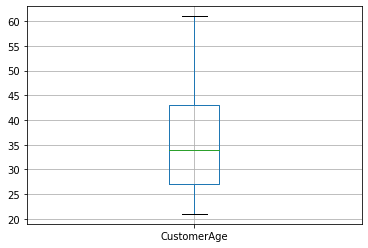

In [21]:
#second check
cleandata4bestdeal.boxplot(column='CustomerAge')

Finally for our last columns that had the object data type, we will clean them manually.

In [22]:
#make spaces in the column into zeros instead
cleandata4bestdeal['DellLaptop'] = cleandata4bestdeal['DellLaptop'].replace(" ", 0)

#chnage column type
cleandata4bestdeal['DellLaptop'] = pd.to_numeric(cleandata4bestdeal['DellLaptop'])


#change values different than one and zero for this column
cleandata4bestdeal['DellLaptop'].values[cleandata4bestdeal['DellLaptop'] > 1] =1

#########messed that up redo

#check
print(cleandata4bestdeal['DellLaptop'].value_counts())

1    4921
0    4511
Name: DellLaptop, dtype: int64


<ipython-input-22-a20c914f64b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata4bestdeal['DellLaptop'] = cleandata4bestdeal['DellLaptop'].replace(" ", 0)
<ipython-input-22-a20c914f64b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata4bestdeal['DellLaptop'] = pd.to_numeric(cleandata4bestdeal['DellLaptop'])


In [23]:
#do the same above for this column

cleandata4bestdeal['BoseSoundSystem'] = cleandata4bestdeal['BoseSoundSystem'].replace(" ", 0)
cleandata4bestdeal['BoseSoundSystem'] = pd.to_numeric(cleandata4bestdeal['BoseSoundSystem'])
cleandata4bestdeal['BoseSoundSystem'].values[cleandata4bestdeal['BoseSoundSystem'] > 1] =1
#check
cleandata4bestdeal['BoseSoundSystem'].value_counts()

<ipython-input-23-b109e9bc04da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata4bestdeal['BoseSoundSystem'] = cleandata4bestdeal['BoseSoundSystem'].replace(" ", 0)
<ipython-input-23-b109e9bc04da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata4bestdeal['BoseSoundSystem'] = pd.to_numeric(cleandata4bestdeal['BoseSoundSystem'])


0    4901
1    4531
Name: BoseSoundSystem, dtype: int64

#### other concerning notes while exploring data

- everyone in the df bought an HPlaptop
- zip codes are categorical data so a boxplot may not be the best measurement to assess the values
- There are a combinatio of both 4 and 5 digit zip codes, which is odd. Zip codes in the U.S. have only five digits. Although, the instructor stated we don't have to assess zip codes beyond the null values.
- quite a few 4 digit zip codes have a significant amount of records in it
    


### Lets store the cleaned data into the Database

In [4]:
engine=create_engine('sqlite:///bestdeal.db')

In [21]:
cleandata4bestdeal.to_sql('trans4cust', engine)

** Sanity Test: Did it create the table in bestdeal.db?  Check!!**

In [22]:
insp=inspect(engine)

In [23]:
 insp.get_table_names()

['trans4cust']

In [24]:
pd.read_sql_table('trans4cust', engine).columns

Index(['index', 'ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED',
       'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet',
       'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU',
       'WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard',
       'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter',
       'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet',
       'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame',
       'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [25]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust WHERE ZipCode='60616'", engine)

In [13]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,3,60616.0,56.0,0,1,1,1,0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,16,60616.0,43.0,0,1,1,0,1,0.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
2,18,60616.0,54.0,1,0,0,1,0,1.0,1.0,...,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,23,60616.0,43.0,1,1,1,0,1,1.0,1.0,...,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1
4,34,60616.0,31.0,0,1,1,1,0,0.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1


#### Query example #2: get the transactions for ALL customers

In [5]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust", engine)

In [6]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,0,30134.0,35.0,1,1,1,0,0,1.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,1,62791.0,43.0,0,1,0,0,1,0.0,1.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,3,60616.0,56.0,0,1,1,1,0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,5,2108.0,55.0,1,1,1,1,1,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
4,6,90033.0,44.0,1,1,1,1,0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [16]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust GROUP BY ZipCode  ORDER BY ZipCode", engine)

In [19]:
resultsForBestDealCustTrans

,ZipCode,num_customers
0,2108.0,632
1,2109.0,955
2,2110.0,224
3,10065.0,788
4,30134.0,1173
5,30303.0,1001
6,33129.0,554
7,33130.0,280
8,44114.0,526
9,60532.0,243


#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [17]:
resultsForBestDealCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE ZipCode=60616 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)

In [18]:
resultsForBestDealCustTrans

,CustomerAge,num_customers
0,21.0,56
1,22.0,32
2,23.0,40
3,25.0,88
4,26.0,48
5,27.0,32
6,28.0,32
7,29.0,56
8,31.0,16
9,32.0,16


#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products(either bought one of these products or the two products)

In [19]:
SonyTV60LEDCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE SonyTV60LED=1  GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE BoseSoundSystem=1 GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

In [20]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,2108.0,416
1,2109.0,611
2,10065.0,467
3,30134.0,774
4,30303.0,524
5,60616.0,697


In [21]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,2109.0,436
1,30134.0,832
2,30303.0,472
3,60616.0,467
4,90033.0,406


In [22]:
SonyTV60LEDCustTrans.ZipCode


0     2108.0
1     2109.0
2    10065.0
3    30134.0
4    30303.0
5    60616.0
Name: ZipCode, dtype: float64

In [23]:
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))




sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0

        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0


        
bose_zip= sorted(bose_dict.keys())

sony_zip= sorted(sony_dict.keys())

bose_zip_tuple=tuple(bose_zip)

sony_zip_tuple=tuple(sony_zip)

bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)


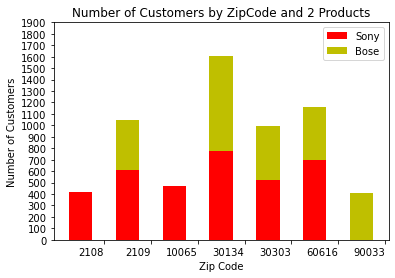

In [24]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


ind = np.arange(len(sony_customer_tuple))    


# the width of the bars: can also be len(x) sequence
width = .5


p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

# Requirements :
1. (Use SQL/SQlite): get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge
2. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)
3. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD)


1. (Use SQL/SQlite): get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge


In [7]:
dell_and_print=pd.read_sql_query(
"SELECT CustomerAge, COUNT(*) as 'num_customers' FROM trans4cust WHERE DellLaptop=1 AND HPPrinter=1 GROUP BY CustomerAge ORDER BY CustomerAge", engine)

dell_and_print


,CustomerAge,num_customers
0,21.0,209
1,22.0,217
2,23.0,320
3,25.0,65
4,26.0,192
5,27.0,280
6,28.0,56
7,29.0,152
8,31.0,216
9,32.0,184


2. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)

In [24]:
nozip_xbox = pd.read_sql_query("SELECT ZipCode FROM trans4cust GROUP BY ZipCode HAVING SUM(XBOX360) = 0", engine)

nozip_xbox.head()

,ZipCode
0,62791.0


In [27]:
#check
print(cleandata4bestdeal[cleandata4bestdeal['ZipCode'] == 62791])
count_xbox = pd.read_sql_query("SELECT ZipCode, SUM(XBOX360) as bought FROM trans4cust GROUP BY ZipCode", engine)
count_xbox.head

    ZipCode  CustomerAge  SamsungTV46LED SonyTV42LED XBOX360  DellLaptop  \
1   62791.0         43.0               0           1       0           0   
13  62791.0         27.0               1           1       0           1   
53  62791.0         44.0               1           1       0           0   

    BoseSoundSystem  BoseHeadSet  SonyHeadSet  iPod  iPhone  Panasonic50LED  \
1                 1          0.0          1.0   0.0     0.0             1.0   
13                0          0.0          0.0   0.0     0.0             1.0   
53                1          1.0          1.0   0.0     0.0             0.0   

    SonyPS4  WiiU  WDexternalHD  SamsungTV55LED  SonyTV60LED  \
1       1.0   1.0           1.0             0.0          1.0   
13      0.0   0.0           1.0             0.0          0.0   
53      0.0   1.0           1.0             0.0          0.0   

    SandiskMemoryCard  SonySoundSystem  SonyCamera  PanasonicCamera  \
1                 1.0              0.0           1

<bound method NDFrame.head of      ZipCode  bought
0     2108.0   576.0
1     2109.0   739.0
2     2110.0   128.0
3    10065.0   620.0
4    30134.0   925.0
5    30303.0   781.0
6    33129.0   481.0
7    33130.0   240.0
8    44114.0   429.0
9    60532.0   211.0
10   60585.0   152.0
11   60603.0   152.0
12   60611.0    54.0
13   60616.0   871.0
14   62791.0     0.0
15   90024.0   128.0
16   90033.0   561.0
17   94102.0   130.0
18   94158.0   384.0
19  794158.0     8.0
20  830134.0     8.0
21  844114.0     8.0
22  860616.0     8.0
23  930134.0     8.0
24  960616.0     8.0
25  990033.0     8.0>

3. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD)

In [73]:
HPPrinter_trans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE HPPrinter=1 AND WDexternalHD=0 GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)

HPLaptop_trans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE HPLaptop=1 AND WDexternalHD=0 GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)


In [74]:
import numpy
HPLaptop_age_tups=tuple(HPLaptop_trans.CustomerAge.astype(numpy.int))
HPLaptop_num_tups=tuple(HPLaptop_trans.num_customers.astype(numpy.int))

HPPrinter_age_tups=tuple(HPPrinter_trans.CustomerAge.astype(numpy.int))
HPPrinter_num_tups=tuple(HPPrinter_trans.num_customers.astype(numpy.int))




lapt_dict = dict(zip(HPLaptop_age_tups, HPLaptop_num_tups))
print_dict = dict(zip(HPPrinter_age_tups, HPPrinter_num_tups))

for key in lapt_dict.keys():
    if ((key in print_dict.keys()) == False): print_dict[key]=0

        
for key in print_dict.keys():
    if ((key in lapt_dict.keys()) == False): lapt_dict[key]=0


        
lapt_zip= sorted(lapt_dict.keys())

print_zip= sorted(print_dict.keys())

lapt_zip_tuple=tuple(lapt_zip)

print_zip_tuple=tuple(print_zip)

lapt_customer_list=[]

for lapt in lapt_zip_tuple:
    lapt_customer_list.append(lapt_dict[lapt])

print_customer_list=[]

for printer in print_zip_tuple:
    print_customer_list.append(print_dict[printer])

lapt_customer_tuple=tuple(lapt_customer_list)
print_customer_tuple=tuple(print_customer_list)


In [75]:
len(HPPrinter_trans_tups)
len(HPLaptop_trans_tups)

30

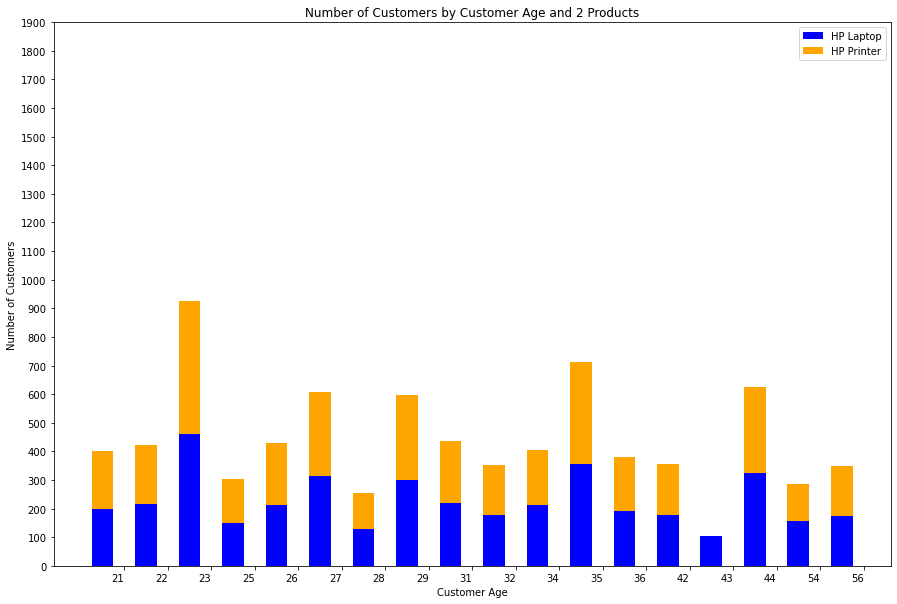

In [76]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

fig = plt.figure(figsize=(15,10))
ind = np.arange(len(lapt_customer_tuple))    

width = .5


p1 = plt.bar(ind, lapt_customer_tuple, width,  color='blue')
p2 = plt.bar(ind, print_customer_tuple, width, color='orange', bottom=lapt_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Customer Age')

plt.title('Number of Customers by Customer Age and 2 Products')

plt.xticks(ind + width, lapt_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('HP Laptop', 'HP Printer'))

plt.show()